In [ ]:
#Graphs will be labeled as Final Graph 1, 2, and 3 with #Notes; all other graphs are left as a means to
#show the process of building the graphs, and/or failing and trying again.

In [46]:
library('tidyverse')

In [47]:
 df.marathon = read.csv('marathon.csv')
df.marathon |> head()

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2,2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
3,2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
4,2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
5,2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
6,2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


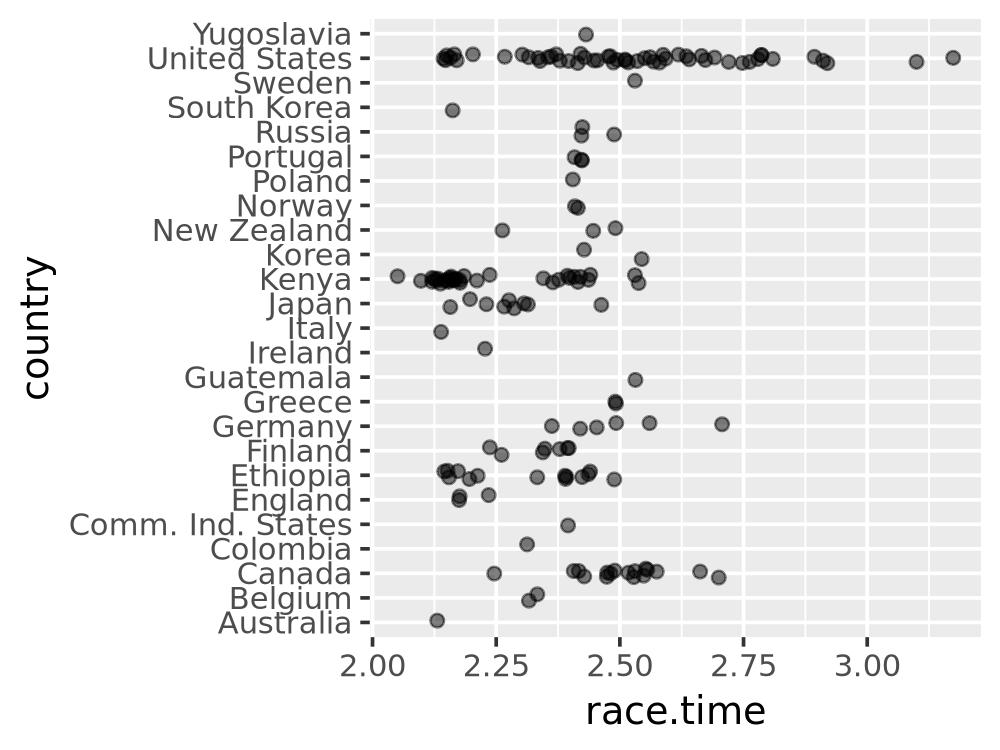

In [4]:
df.marathon |>
ggplot(aes(x = race.time, y = country)) +
    geom_point(alpha = .5, position = position_jitter(height = .2))

In [ ]:
df.marathon |>
    group_by (MF) |>
    summarize

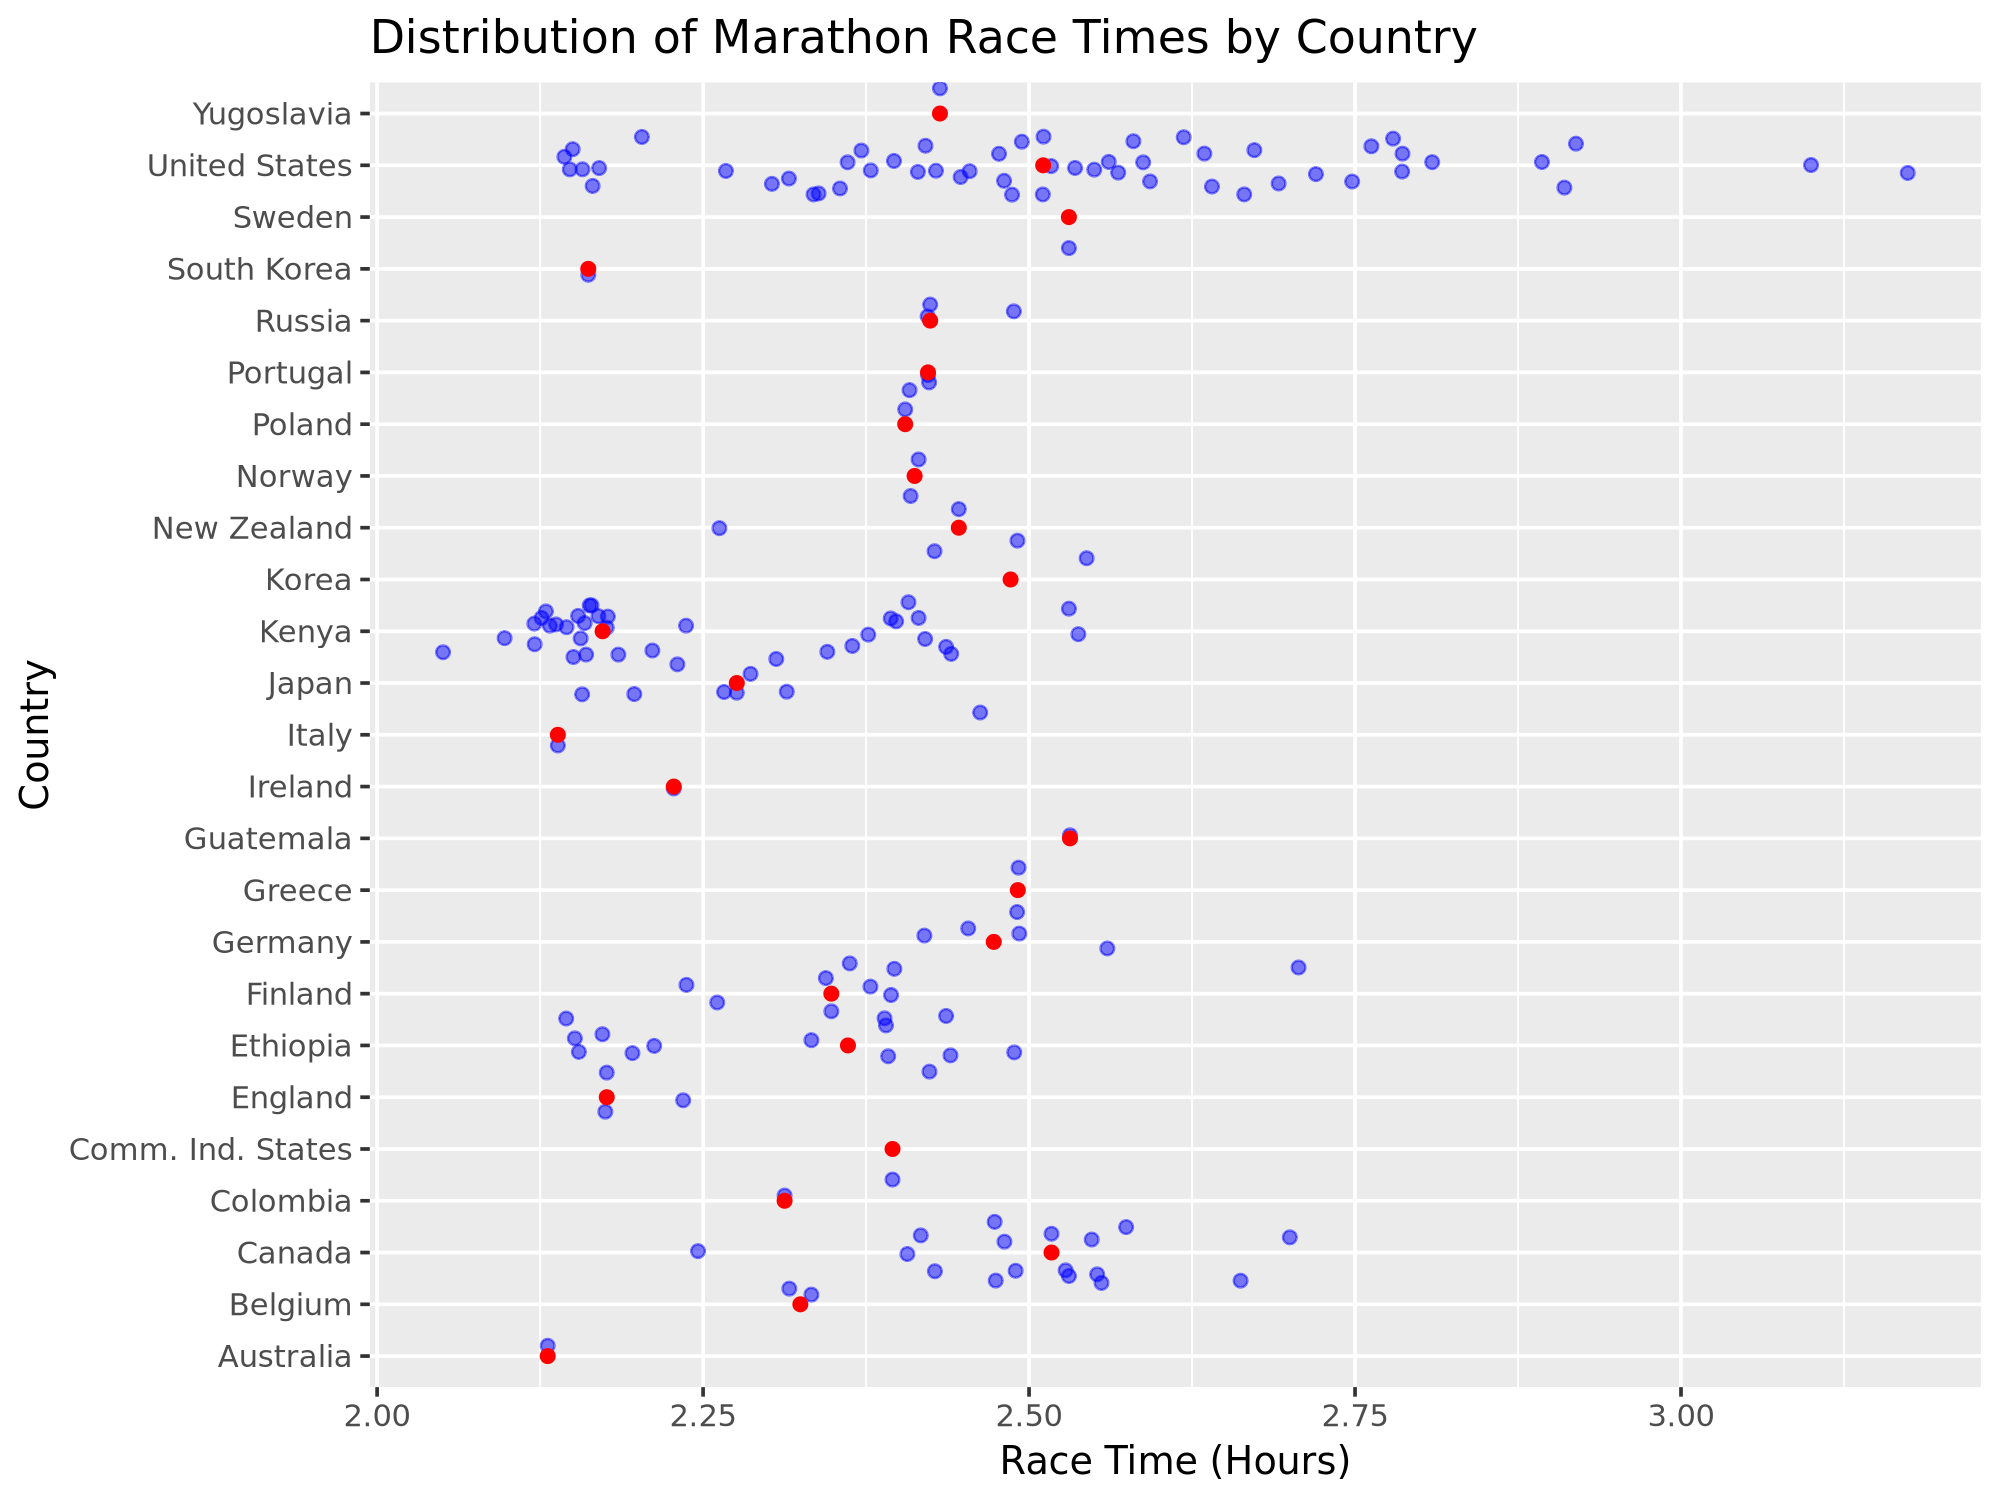

In [61]:
#Final Graph 1
options(repr.plot.width = 8, repr.plot.height = 6)

df.marathon |>
    ggplot(aes(x = race.time, y = country)) +
    geom_point(alpha = .5, position = position_jitter(height = .6, width = 0), color = "blue", size = 1.5) +
    geom_point(color = 'red', data = df.marathon |> 
               group_by(country) |>
               summarize(race.time = median(race.time))) +
labs(
    title = "Distribution of Marathon Race Times by Country",
    x = "Race Time (Hours)",
    y = "Country")


In [ ]:
#This graph illustrates the past marathon winner times by country. In this graph, I visualized the 
#distribution of marathon race times across different 
#countries using the df.marathon dataset. On the horizontal axis, I plotted race time (in hours), and on 
#the vertical axis, I displayed the country of each runner. To represent individual marathon times, I used 
#blue points for each data entry, where each point represents the race time of a runner from a particular 
#country. I applied position jitter to the points, which helps to prevent overlap, making it easier to see 
#the distribution of times, especially when multiple runners from the same country have similar times. The 
#size of the points is set to 1.5, and I used an alpha value of 0.5 to make the points semi-transparent, so 
#the density of points in certain regions can be better observed.

#Additionally, I added red points to represent the median race time for each country, which I calculated by 
#grouping the data by country and then summarizing the race times. These red points provide a clear indication
#of the typical race time for each country, making it easy to compare the central tendency across countries. 
#I also included labels to add context to the graph, with a title that describes the purpose of the graph 
#("Distribution of Marathon Race Times by Country") and axis labels that specify what the horizontal and 
#vertical axes represent ("Race Time (Hours)" and "Country").

#This graph gives a clear view of how marathon race times are distributed across countries, showing both 
#individual race times and the central tendency for each country, allowing for a comparison of race 
#performances by country.

In [5]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
    filter(sports == 'Basketball') |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    select(year, institution_name, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))
ncaa_sports_spending |> head()

year,institution_name,men_or_women,expenditure_usd
<dbl>,<chr>,<chr>,<dbl>
2015,Alabama A & M University,men,817868
2015,Alabama A & M University,women,742460
2015,University of Alabama at Birmingham,men,4189826
2015,University of Alabama at Birmingham,women,1962579
2015,University of Alabama in Huntsville,men,612569
2015,University of Alabama in Huntsville,women,386007


In [18]:
top10 = 
ncaa_sports_spending |> 
    filter(!is.na(expenditure_usd)) |>
    group_by(institution_name) |>
    summarize(sum_exp_usd = sum(expenditure_usd, na.rm = TRUE)) |>
    slice_max(order_by = sum_exp_usd, n = 10) |>
    pull(institution_name)
top10


[1] "Duke University"                   "University of Kentucky"           
 [3] "University of Louisville"          "Texas Christian University"       
 [5] "Syracuse University"               "Florida State University"         
 [7] "Baylor University"                 "University of Connecticut"        
 [9] "Ohio State University-Main Campus" "Indiana University-Bloomington"

In [21]:
ncaa_sports_spending |> filter(institution_name %in% top10) |>
arrange(filter(ncaa_sports_spending, institution_name %in%
  top10), institution_name)

year,institution_name,men_or_women,expenditure_usd
<dbl>,<chr>,<chr>,<dbl>
2015,Baylor University,men,8837724
2015,Baylor University,women,7277627
2015,Duke University,men,17890632
2015,Duke University,women,5771447
2015,Florida State University,men,11730040
2015,Florida State University,women,6714989
2015,Indiana University-Bloomington,men,12129479
2015,Indiana University-Bloomington,women,3189403
2015,Ohio State University-Main Campus,men,9142079


Warning message:
“Removed 609 rows containing missing values or values outside the scale range
(`geom_line()`).”


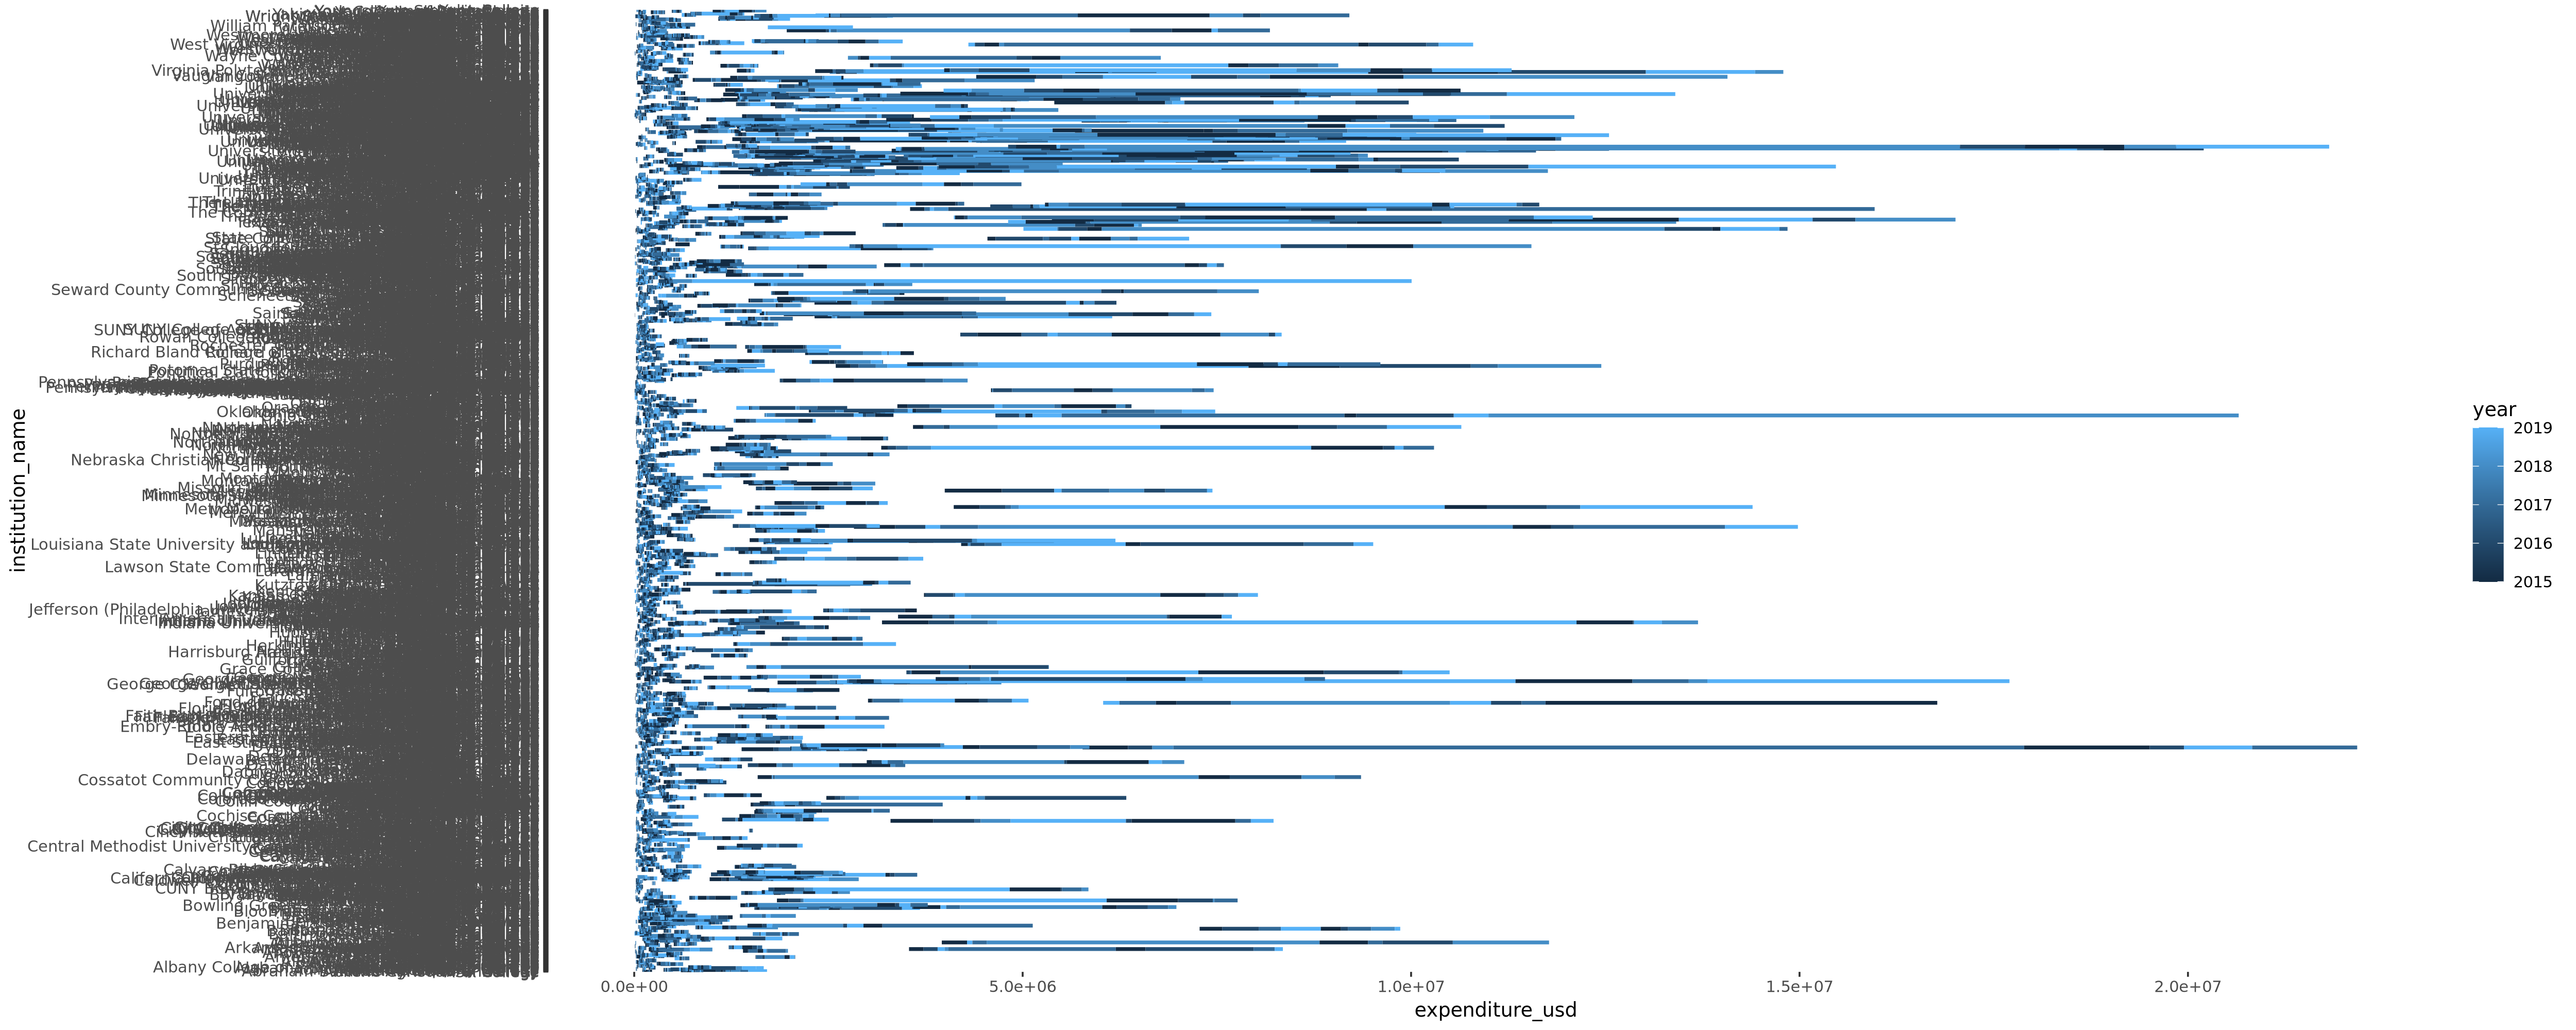

In [25]:
options(repr.plot.width = 20, repr.plot.height = 8)

ggplot(ncaa_sports_spending, aes(y = institution_name, x = expenditure_usd, color = year)) + 
geom_line(linewidth = 1) 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 570 rows containing missing values or values outside the scale range
(`geom_line()`).”


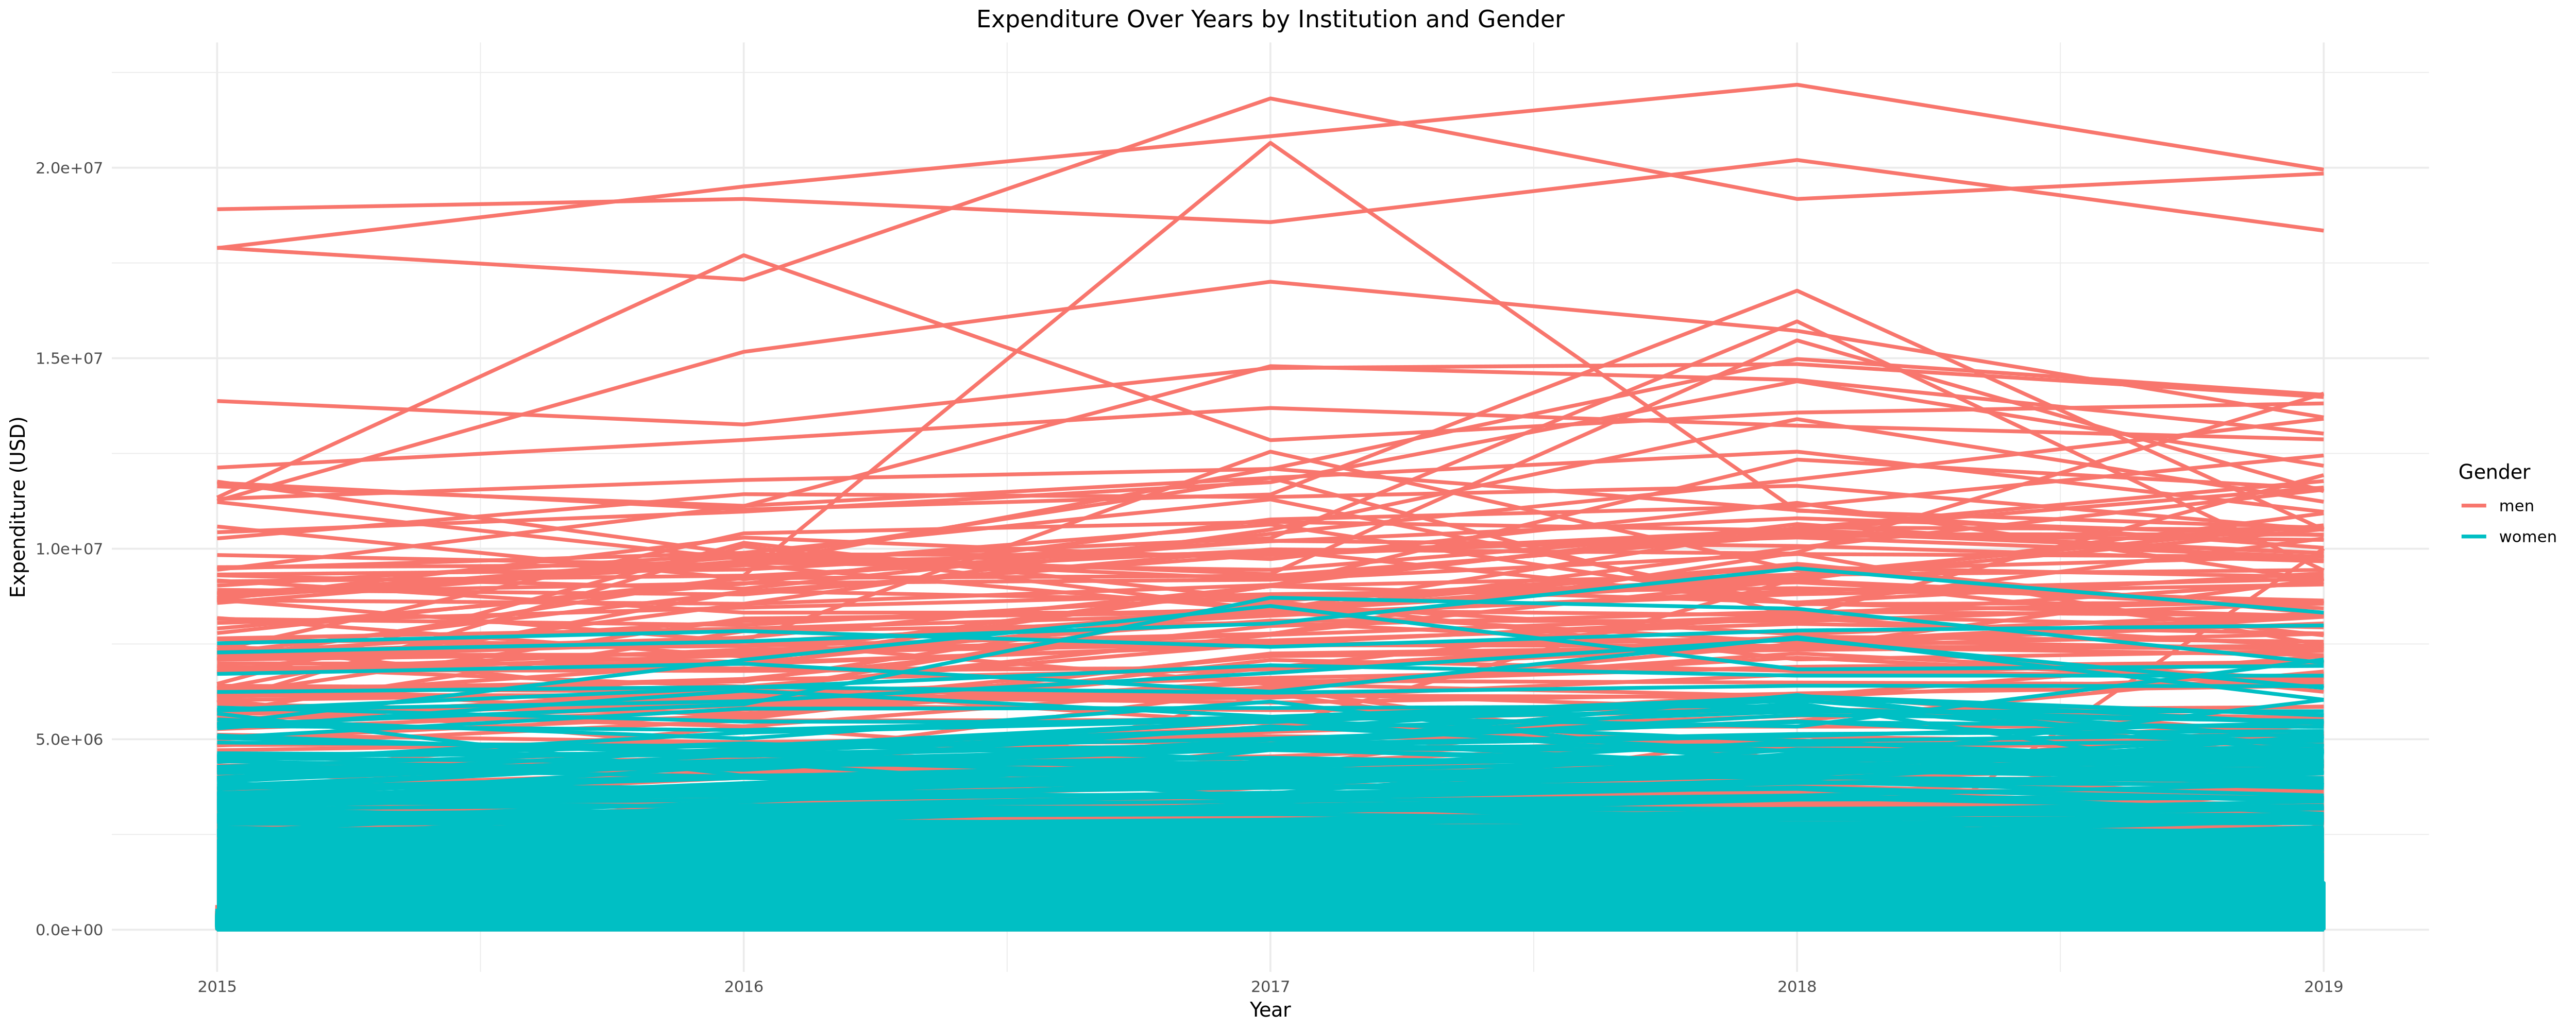

In [33]:
ggplot(ncaa_sports_spending, aes(x = year, y = expenditure_usd, color = men_or_women, group = interaction(institution_name, men_or_women))) +
  geom_line(size = 1) +
  labs(
    title = "Expenditure Over Years by Institution and Gender",
    x = "Year",
    y = "Expenditure (USD)",
    color = "Gender"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

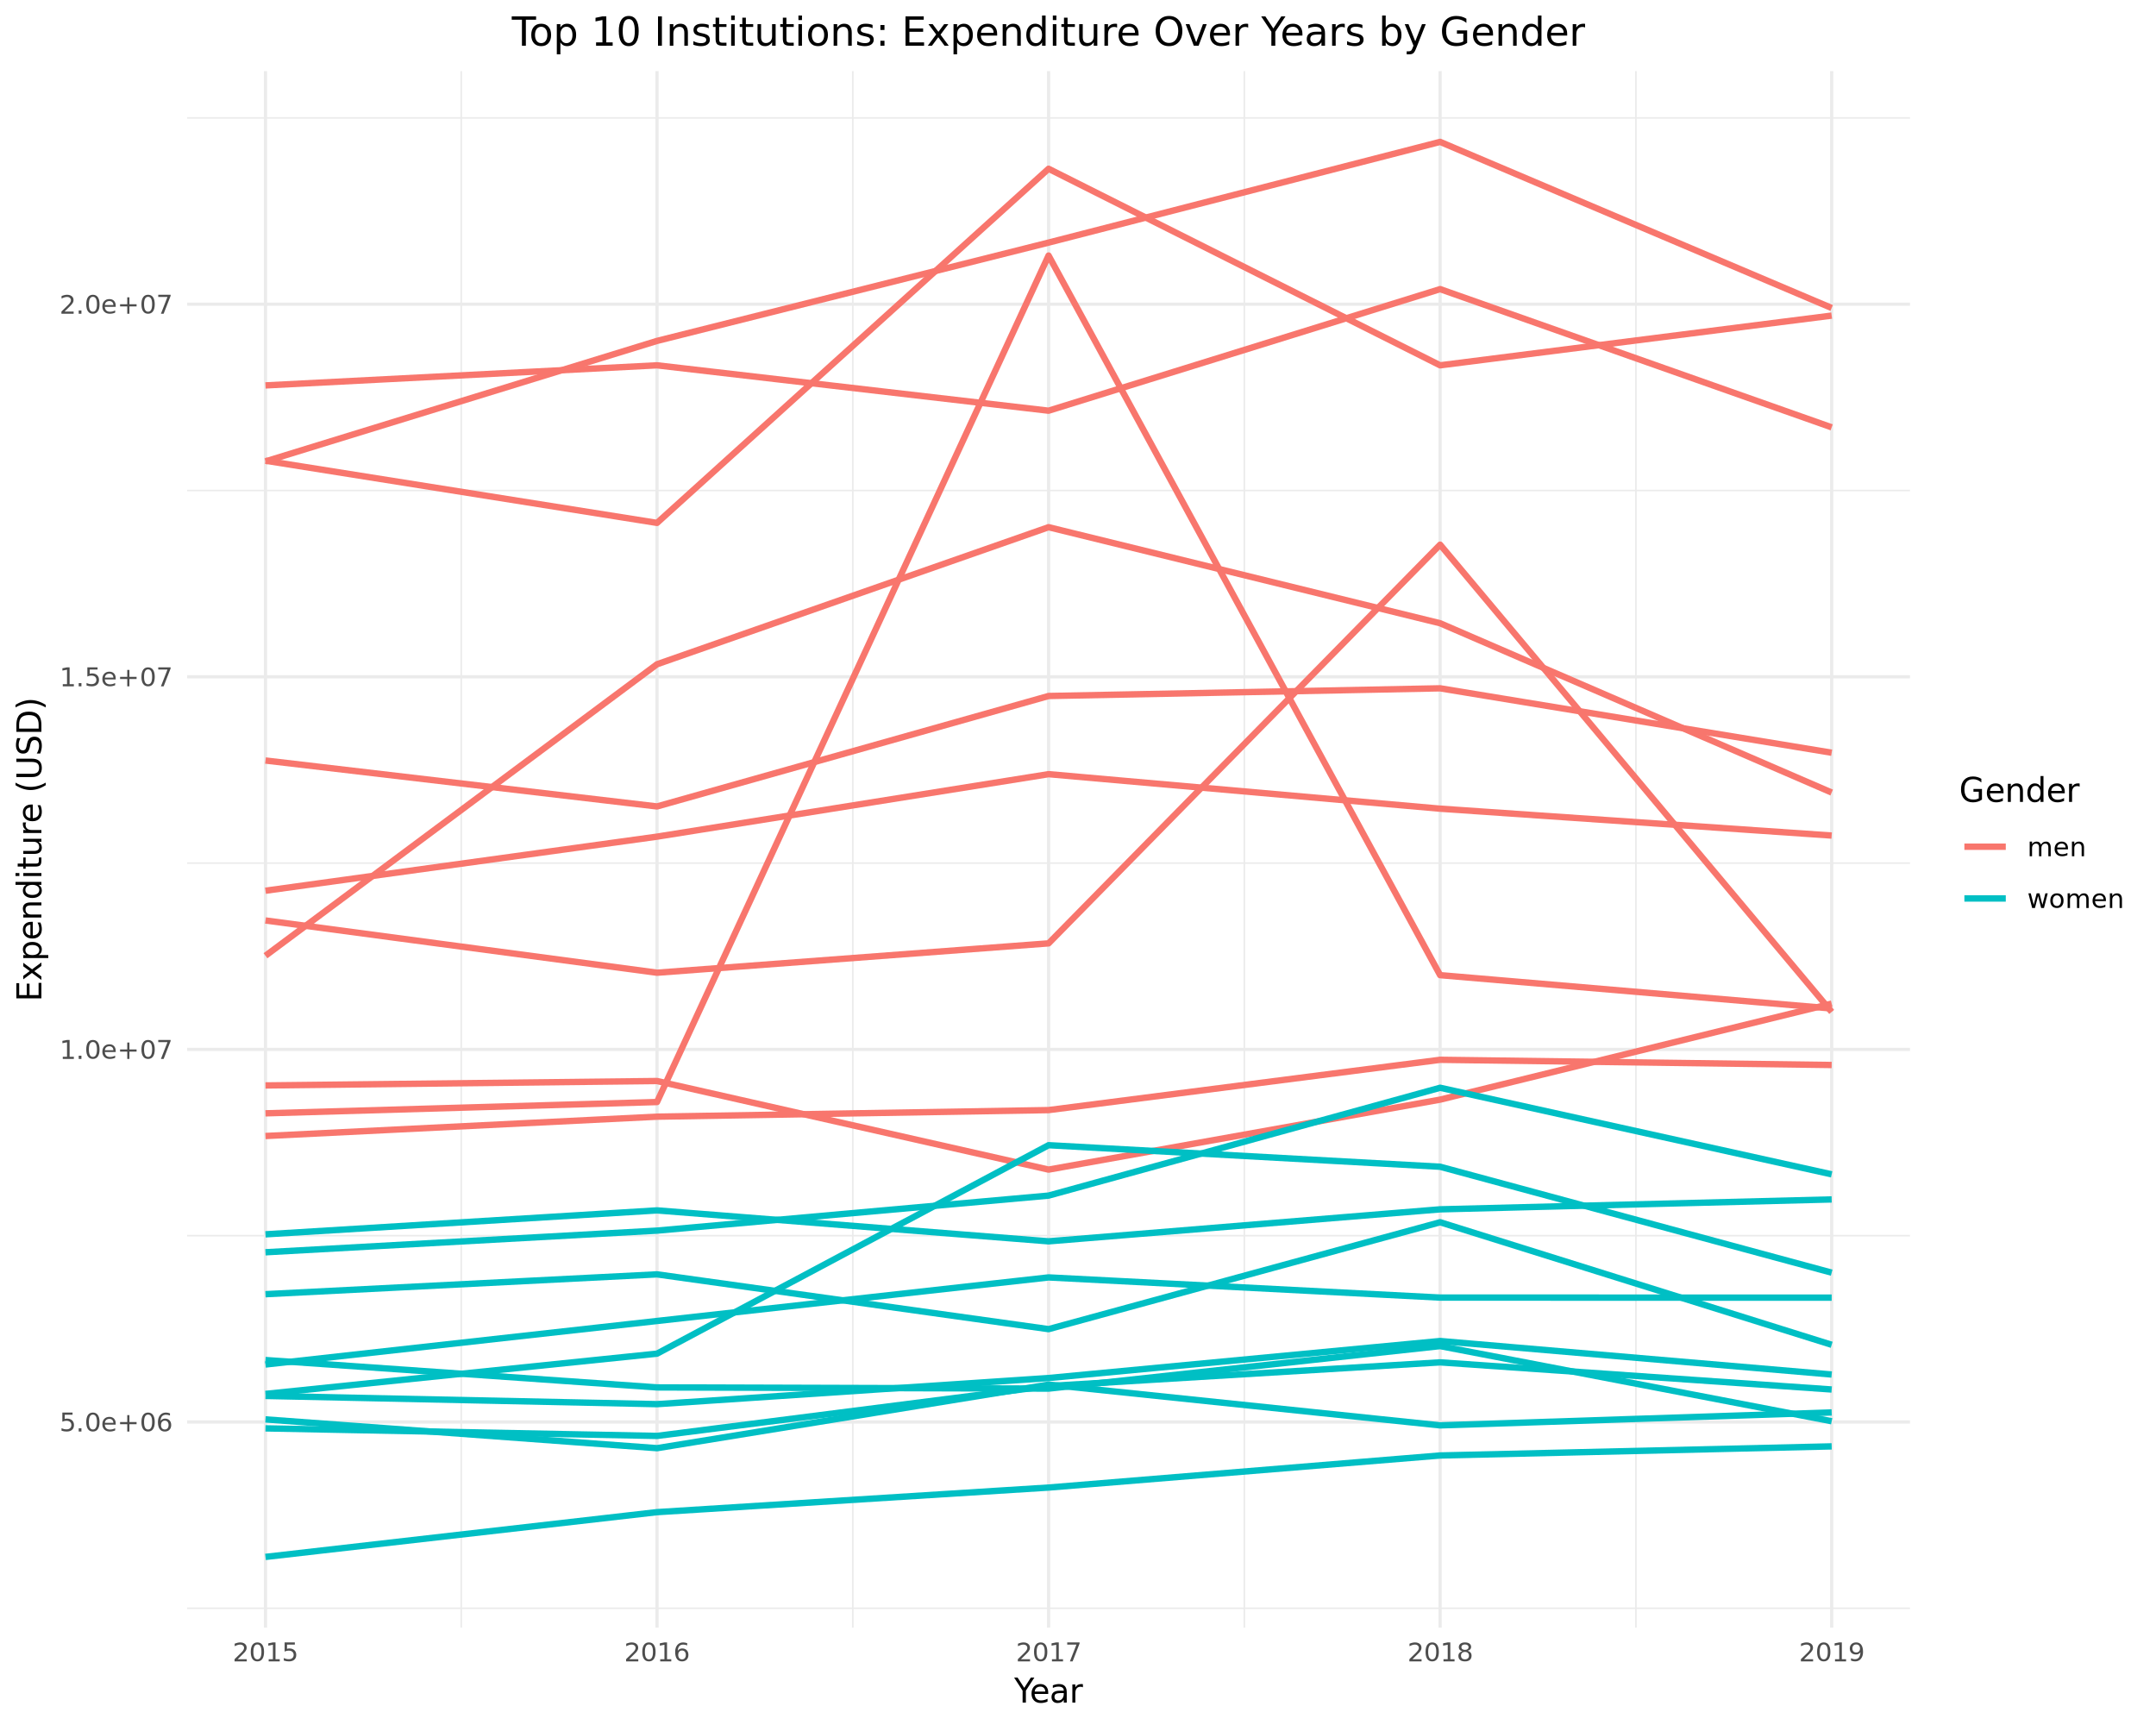

In [37]:
options(repr.plot.width = 10, repr.plot.height = 8)
top10 <- ncaa_sports_spending |> 
  filter(!is.na(expenditure_usd)) |>
  group_by(institution_name) |>
  summarize(sum_exp_usd = sum(expenditure_usd, na.rm = TRUE)) |>
  slice_max(order_by = sum_exp_usd, n = 10) |>
  pull(institution_name)
filtered_data <- ncaa_sports_spending |>
  filter(institution_name %in% top10)
ggplot(filtered_data, aes(x = year, y = expenditure_usd, color = men_or_women, group = interaction(institution_name, men_or_women))) +
  geom_line(size = 1) +
  labs(
    title = "Top 10 Institutions: Expenditure Over Years by Gender",
    x = "Year",
    y = "Expenditure (USD)",
    color = "Gender"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

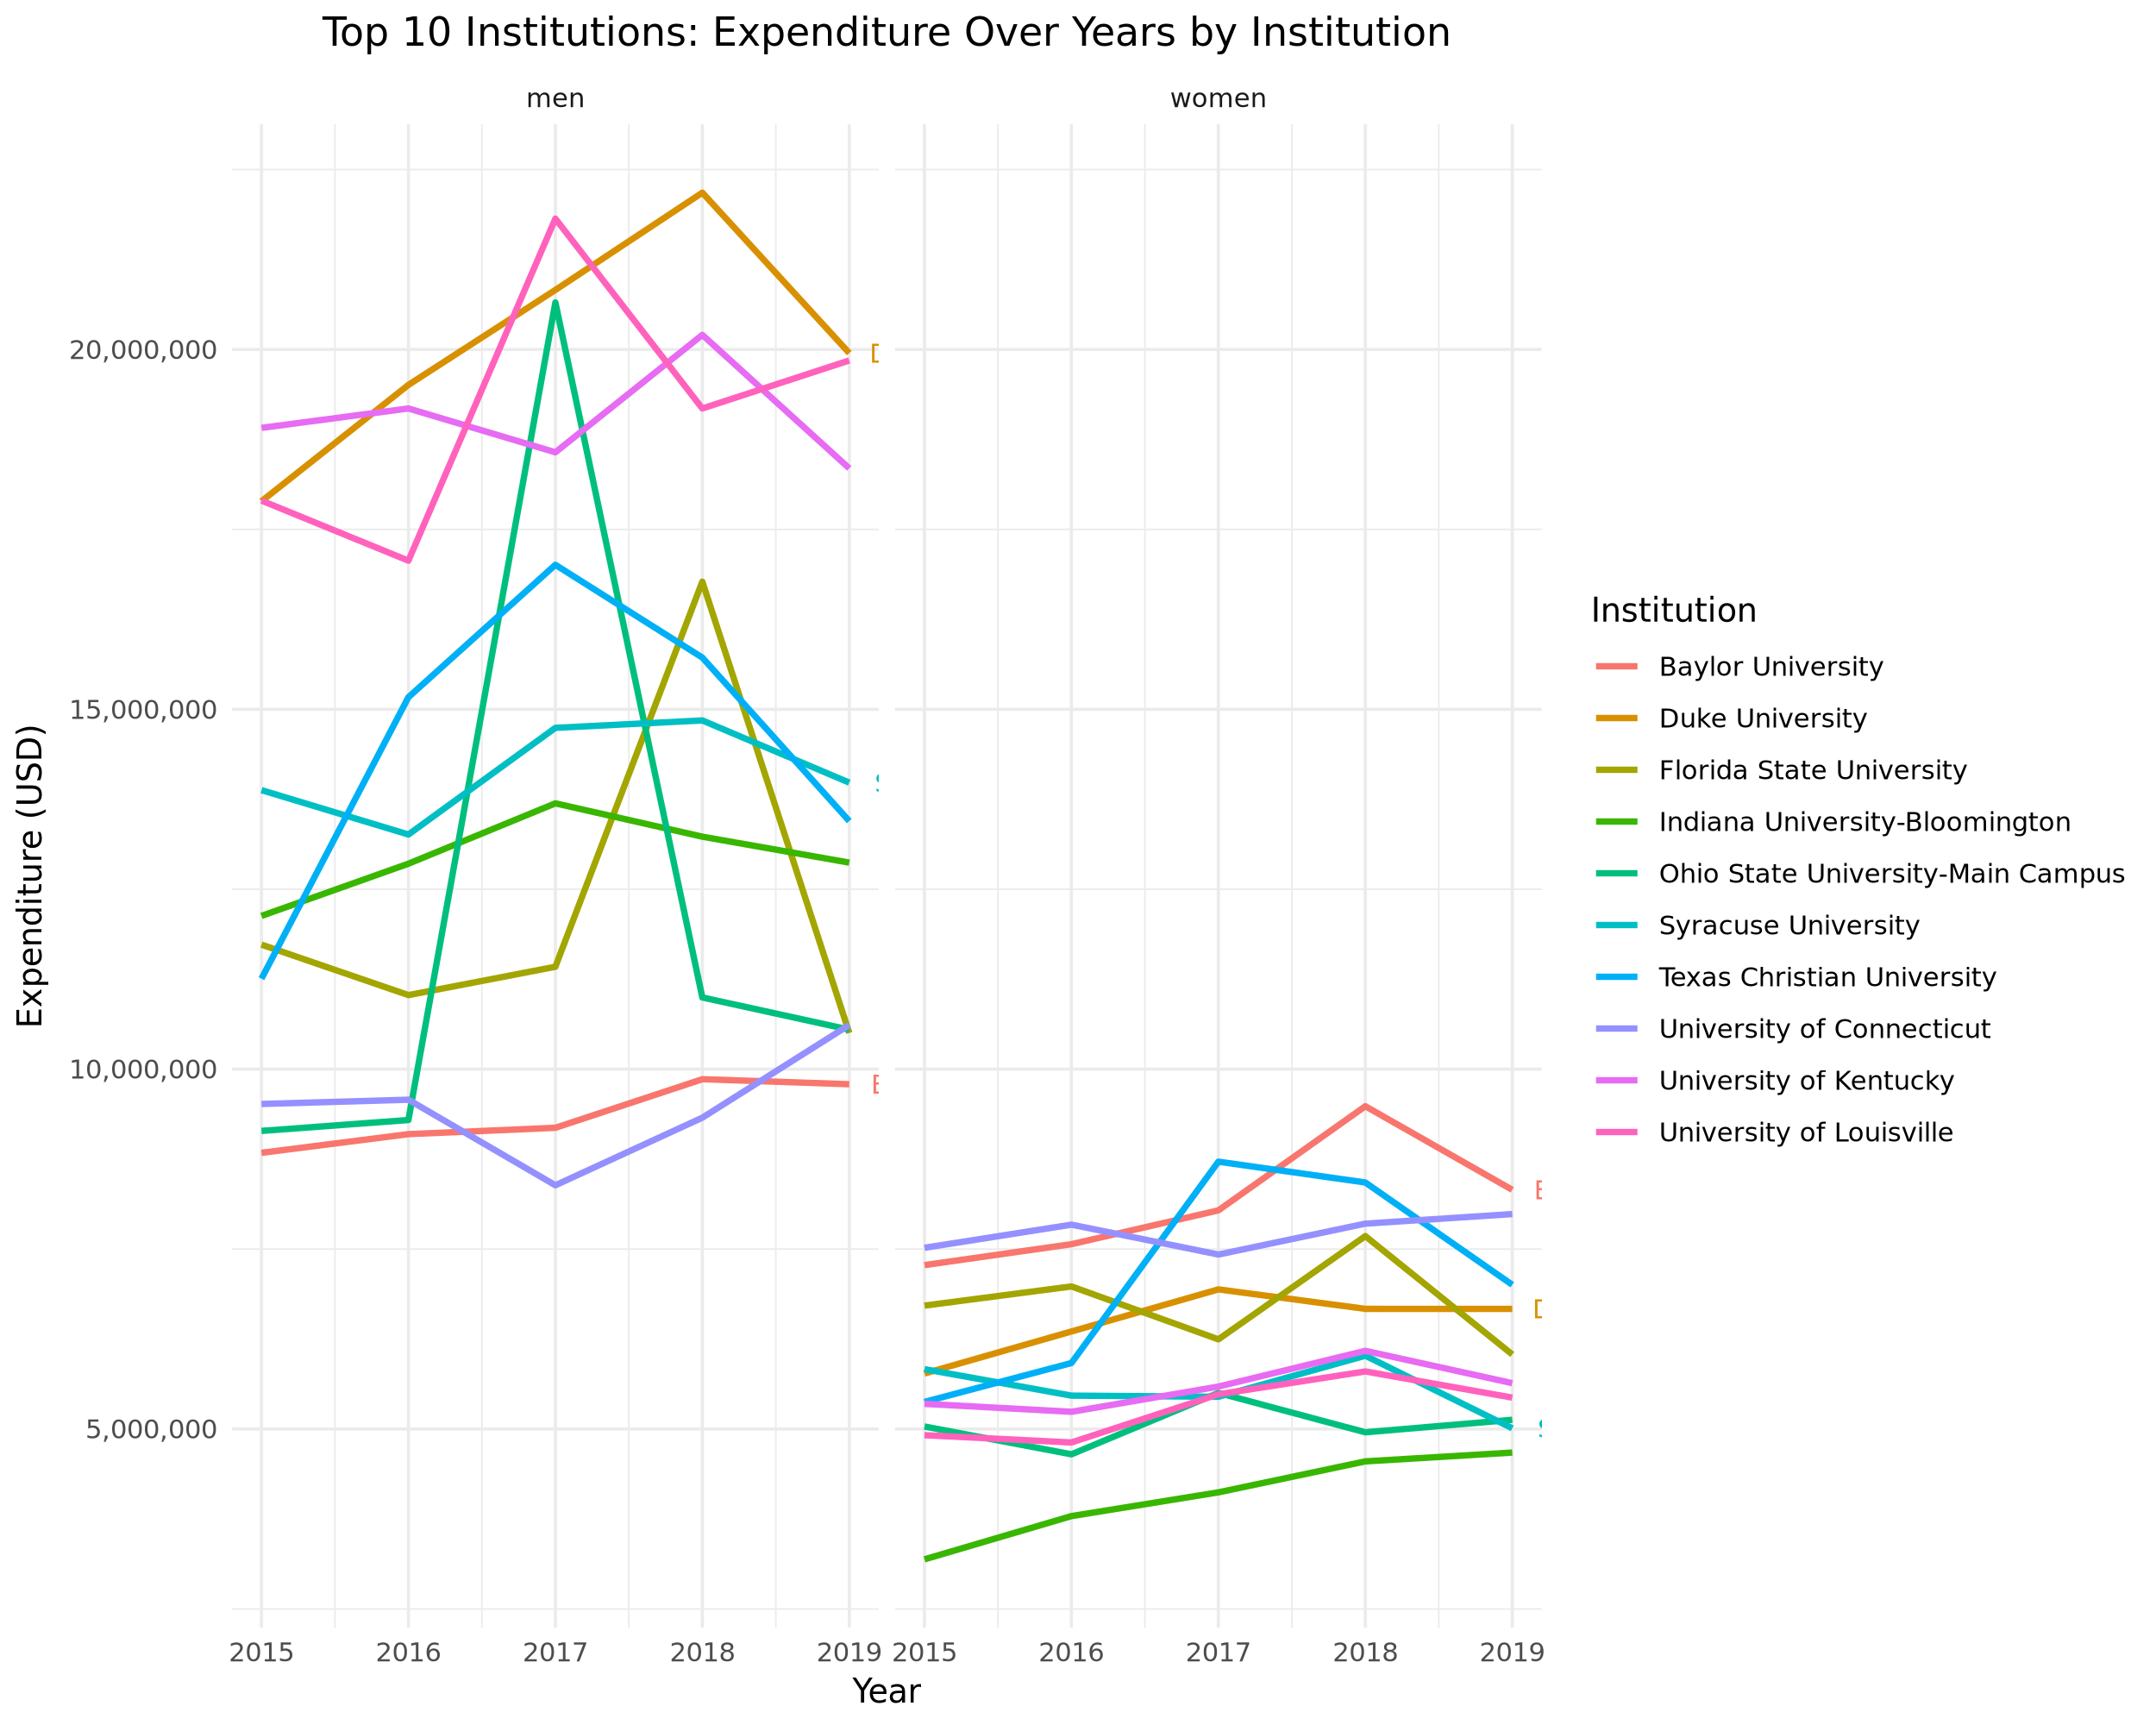

In [44]:
#Final Graph 2
options(repr.plot.width = 10, repr.plot.height = 8)
library(ggplot2)
library(dplyr)

top10 <- ncaa_sports_spending |> 
  filter(!is.na(expenditure_usd)) |>
  group_by(institution_name) |>
  summarize(sum_exp_usd = sum(expenditure_usd, na.rm = TRUE)) |>
  slice_max(order_by = sum_exp_usd, n = 10) |>
  pull(institution_name)
filtered_data <- ncaa_sports_spending |>
  filter(institution_name %in% top10)
label_data <- filtered_data |>
  group_by(institution_name, men_or_women) |>
  filter(year == max(year))
ggplot(filtered_data, aes(x = year, y = expenditure_usd, color = institution_name, group = interaction(institution_name, men_or_women))) +
  geom_line(size = 1) +
  geom_text(data = label_data, aes(label = institution_name), hjust = -0.1, size = 3, show.legend = FALSE) +
  labs(
    title = "Top 10 Institutions: Expenditure Over Years by Institution",
    x = "Year",
    y = "Expenditure (USD)",
    color = "Institution"
  ) +
   scale_y_continuous(labels = scales::comma) +
    facet_wrap(~men_or_women) +
    theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5)
  )

In [ ]:
#The graph above illustrates the top 10 institutions NCAA sports spending expenditure between the years of 
#2015 and 2019. I narrowed down the top 10 institutions based on top expenditure, and then filtered the main 
#data to only include these 10 institutions. Then I created a subset of data for the last year of each 
#institution for labeling and created a line chart to illustrate the trends of each school with a range from
#5-20 million USD. Finally I adjusted the graphs so that you could differentiate between men and women, and 
#see the expenditure written fully out. 

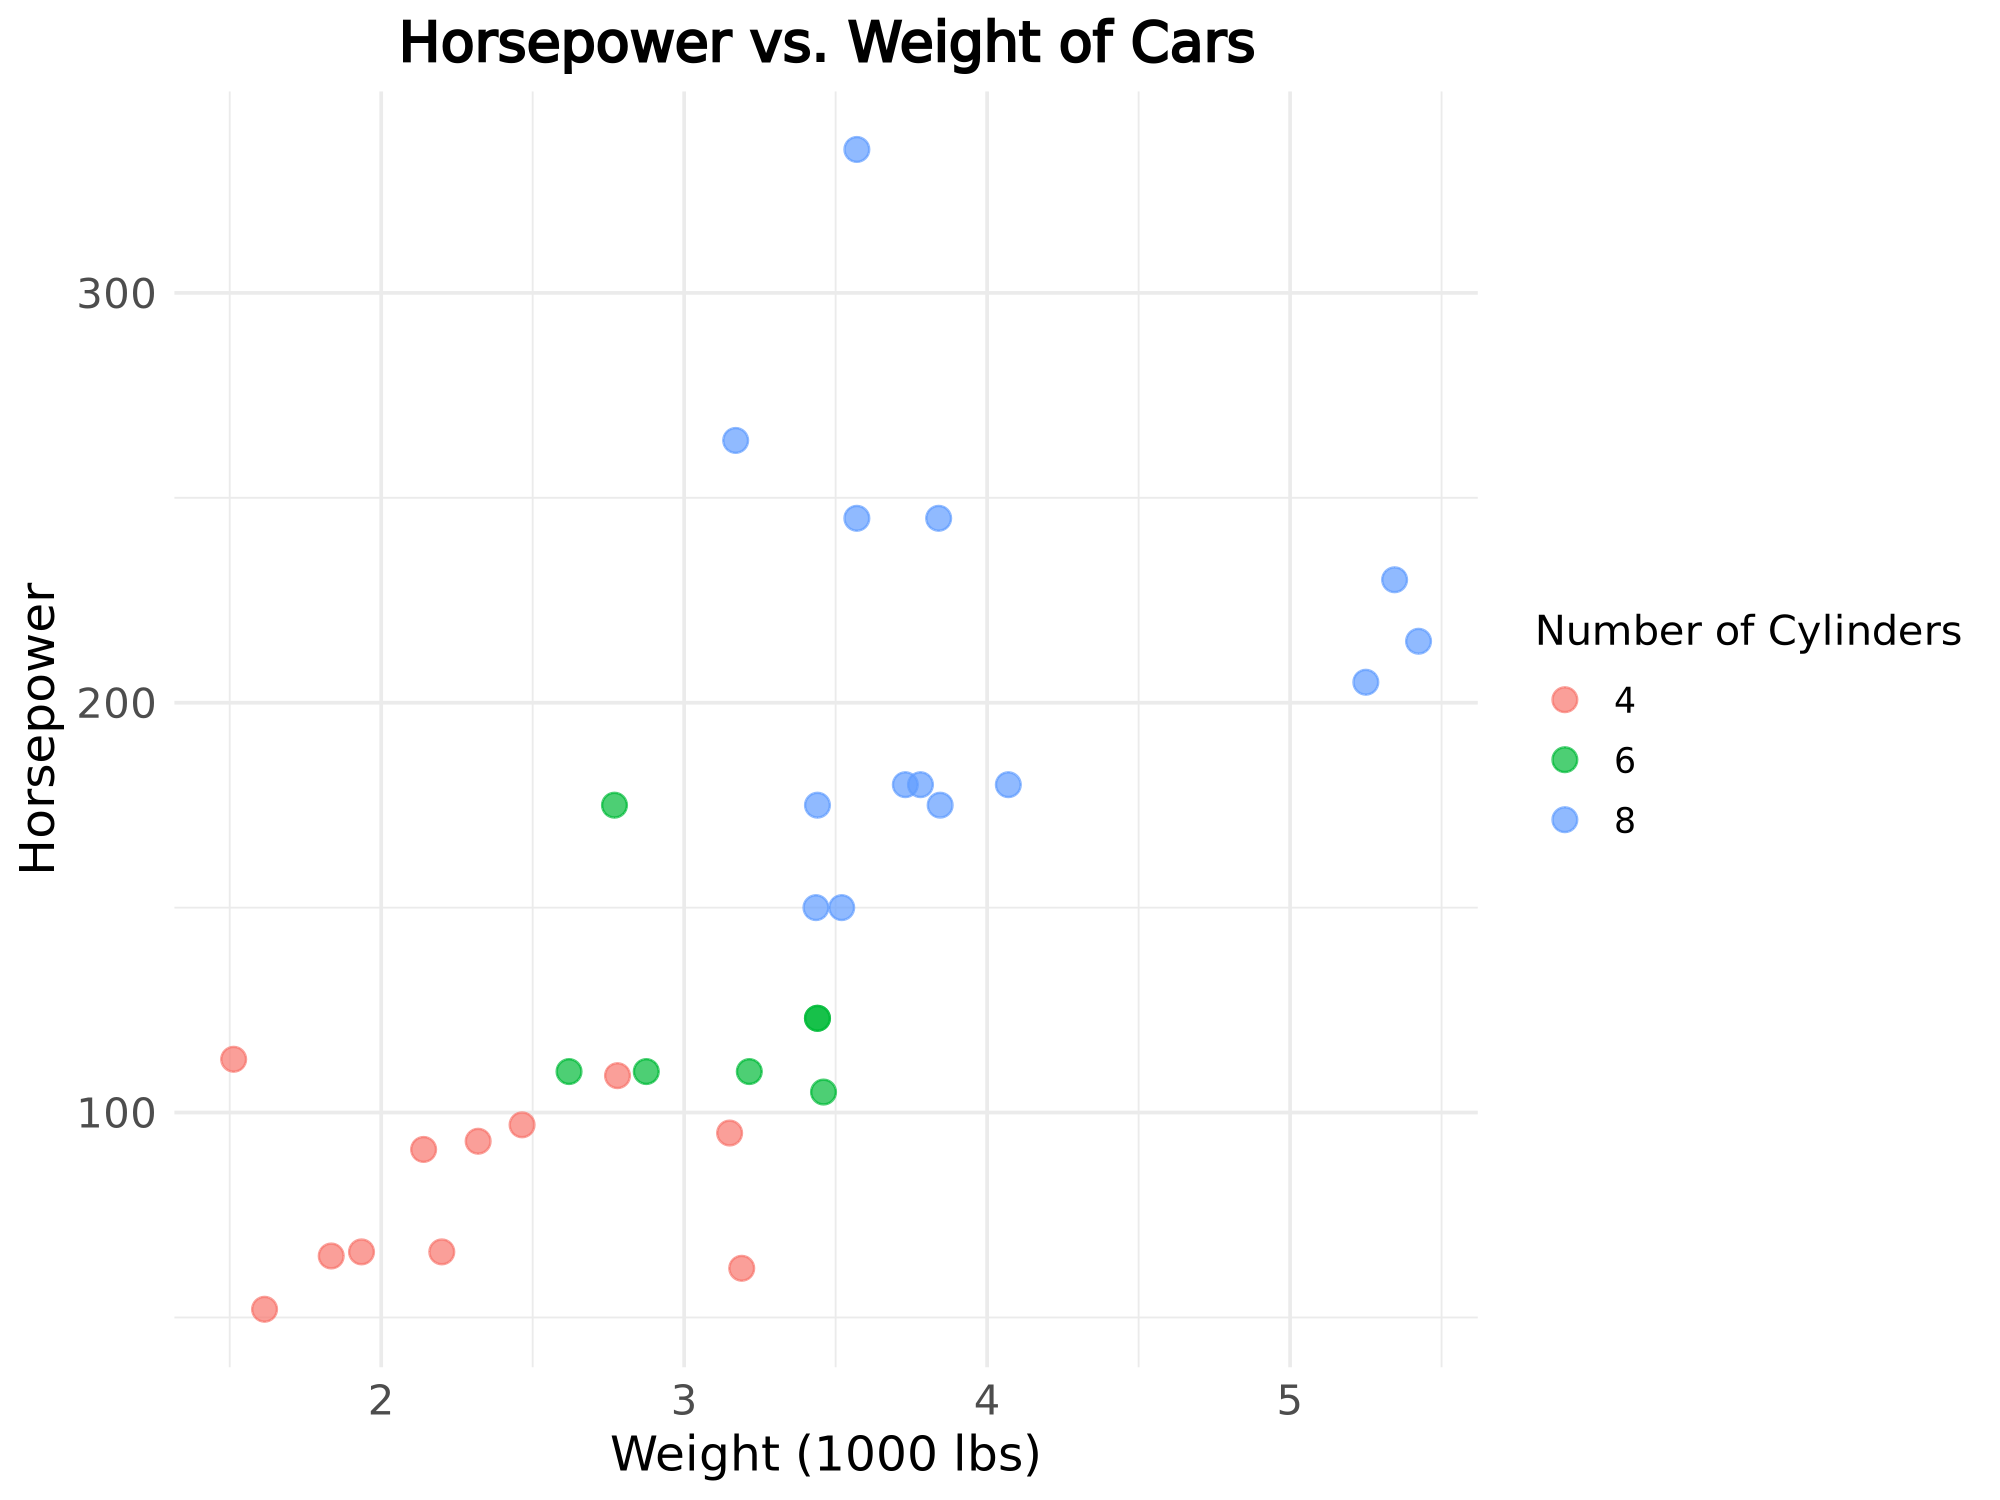

In [65]:
library(ggplot2)


ggplot(mtcars, aes(x = wt, y = hp, color = as.factor(cyl))) +
  geom_point(size = 3, alpha = 0.7) + 
  labs(
    title = "Horsepower vs. Weight of Cars",
    x = "Weight (1000 lbs)",
    y = "Horsepower",
    color = "Number of Cylinders"
  ) +
  theme_minimal() + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

`geom_smooth()` using formula = 'y ~ x'


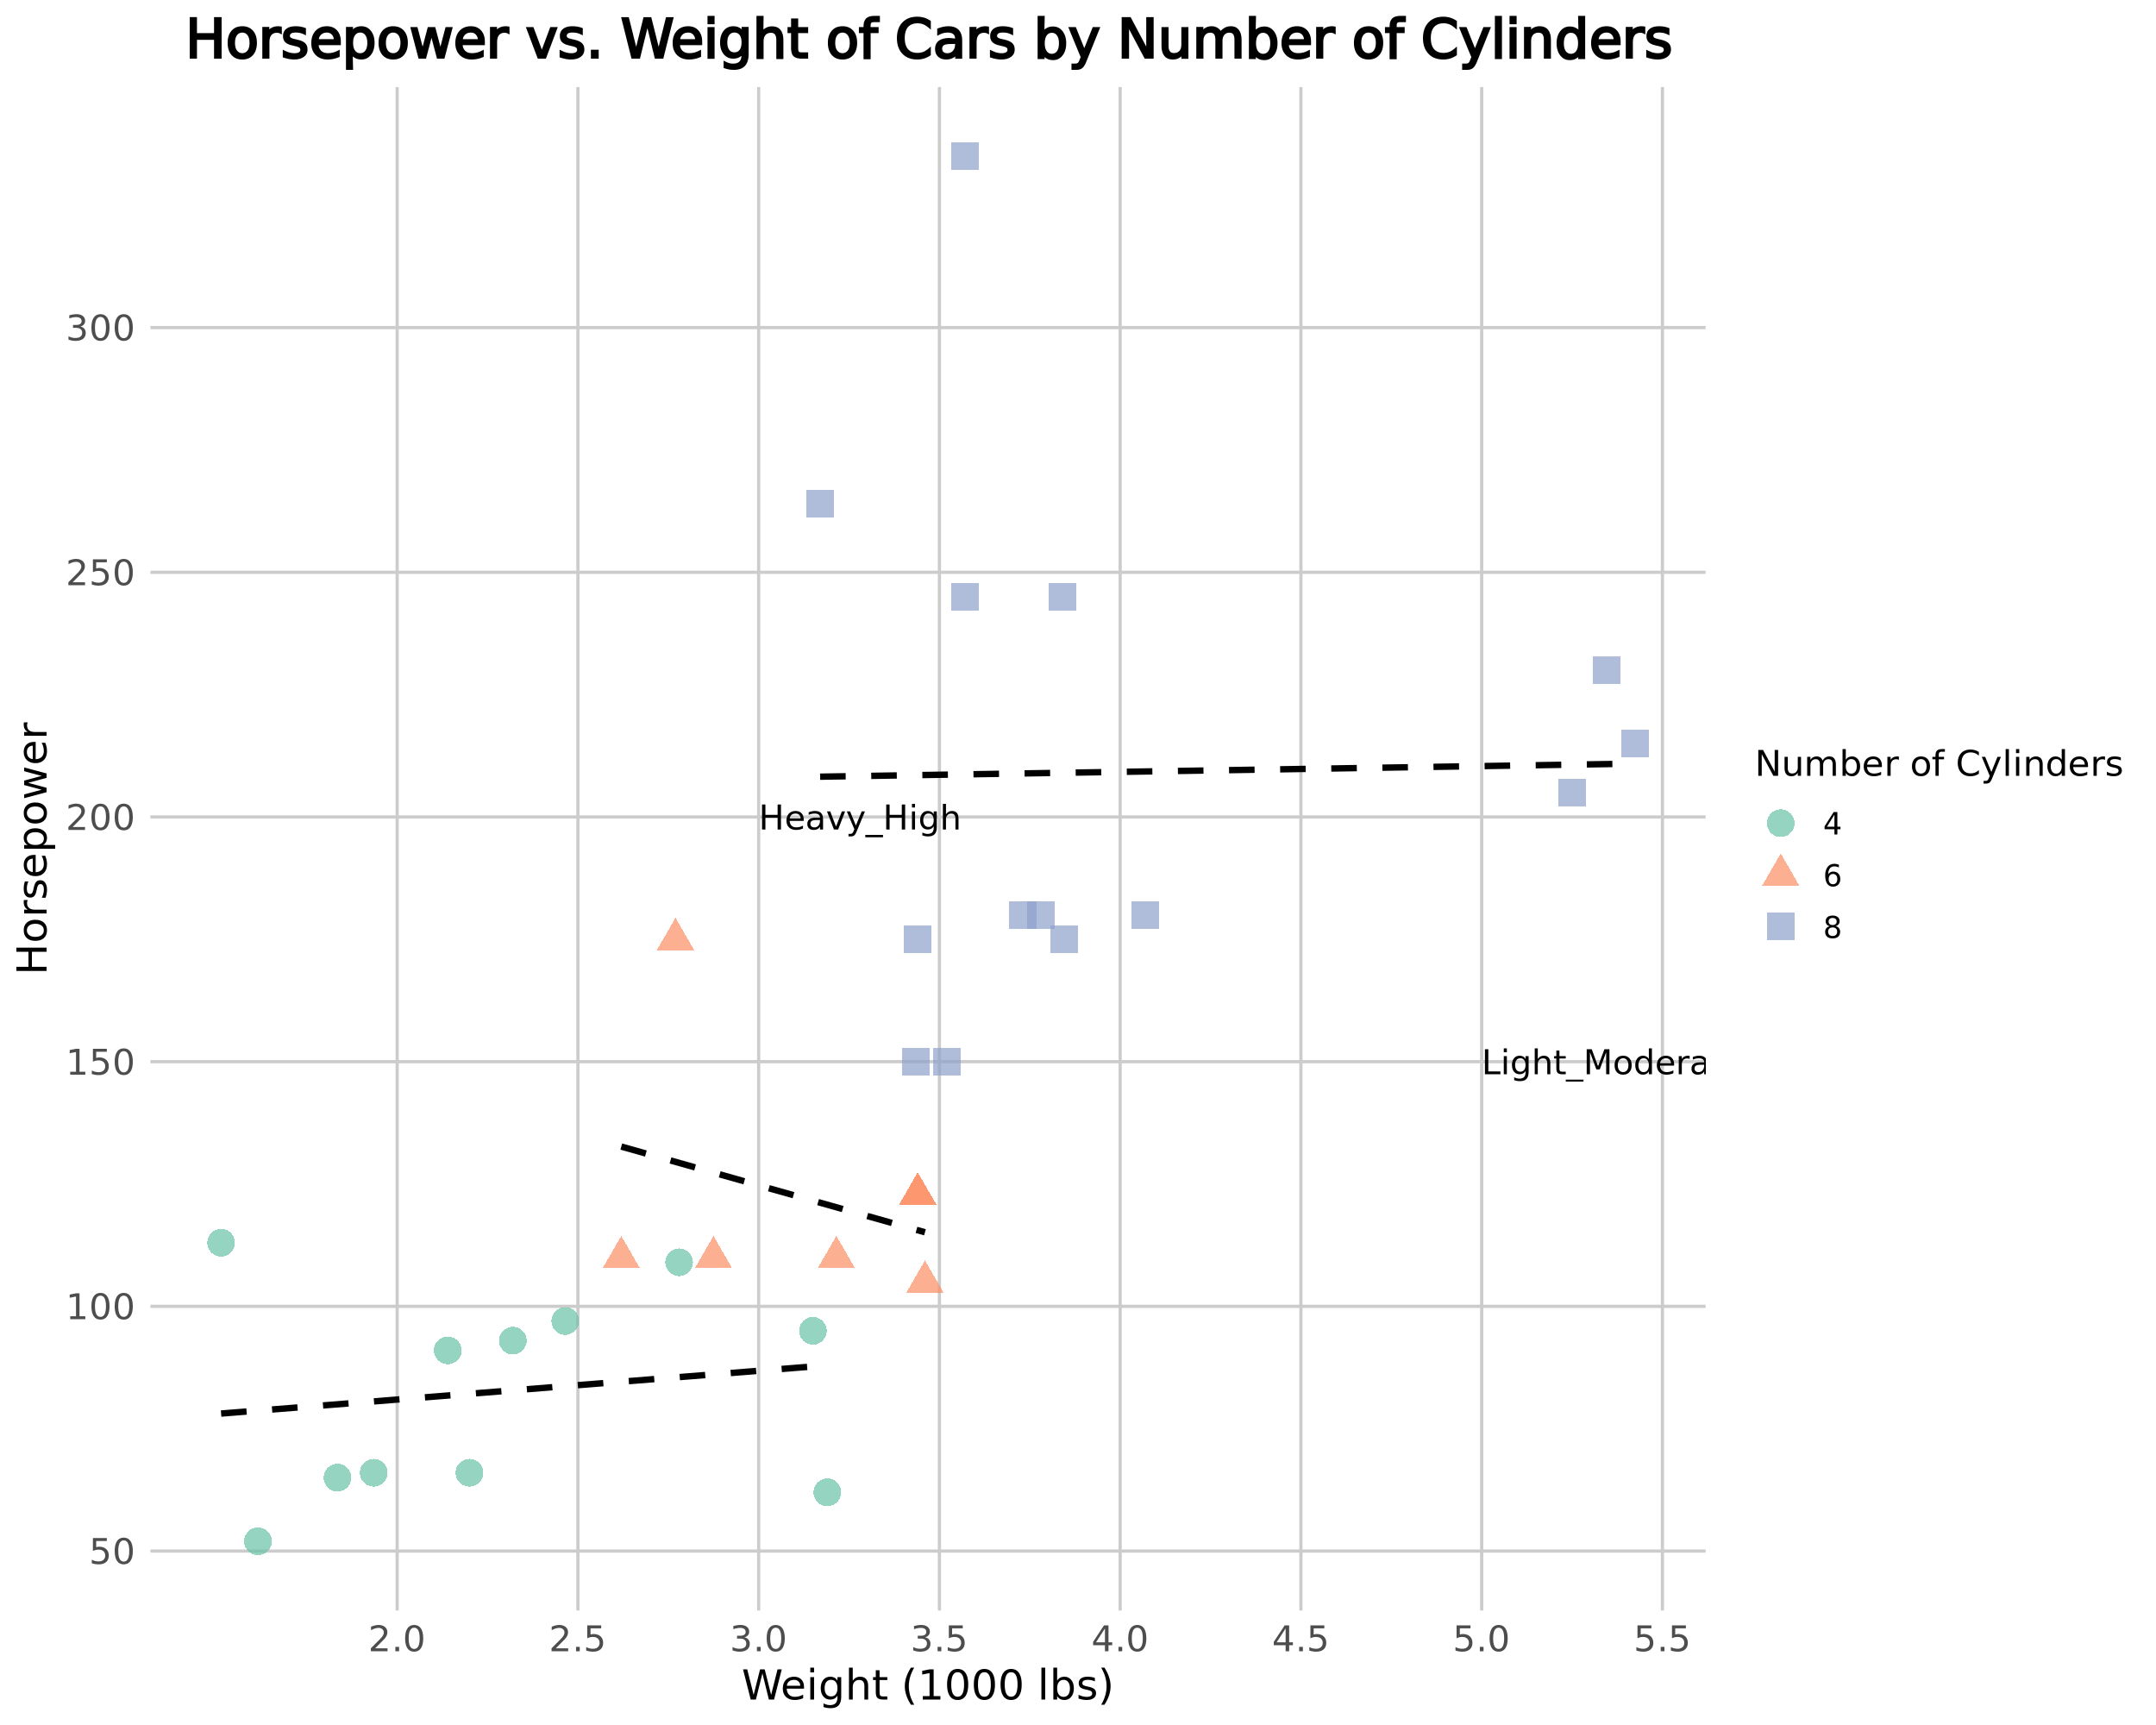

In [71]:
#Final Graph 3
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(mtcars, aes(x = wt, y = hp, color = as.factor(cyl), shape = as.factor(cyl))) +
  geom_point(size = 4, alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", size = 1) +

  labs(
    title = "Horsepower vs. Weight of Cars by Number of Cylinders",
    x = "Weight (1000 lbs)",
    y = "Horsepower",
    color = "Number of Cylinders",
    shape = "Number of Cylinders"
  ) +
  scale_color_brewer(palette = "Set2") +
  scale_x_continuous(breaks = seq(2, 6, by = 0.5)) +
  scale_y_continuous(breaks = seq(50, 350, by = 50)) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    panel.grid.major = element_line(color = "grey80", size = 0.5),
    panel.grid.minor = element_blank()
  ) +
  annotate("text", x = 3, y = 200, label = "Heavy_High", color = "black", size = 4, hjust = 0) +
  annotate("text", x = 5, y = 150, label = "Light_Moderate", color = "black", size = 4, hjust = 0)

In [ ]:
#In creating this scatter plot using the mtcars dataset, I aimed to explore the relationship between car 
#weight (wt) and horsepower (hp). On the horizontal axis, I plotted the weight of the cars (in 1000 lbs), 
#while the vertical axis shows their horsepower. Each data point represents a car, and I used color and 
#shape to distinguish between cars with different numbers of cylinders (cyl). I chose the Set2 color palette 
#to make it easier to visually differentiate between 4, 6, and 8-cylinder cars, and I assigned different 
#shapes to each category as well. To reveal the overall trend between weight and horsepower, I added a linear
#regression line, which is dashed to indicate a positive correlation: as weight increases, horsepower tends 
#to increase too. I also incorporated faceting to create separate scatter plots for each cylinder category, 
#which allows me to compare the weight-horsepower relationship within cars of the same engine type. What 
#stood out in the faceted plots is that cars with more cylinders are generally heavier and have higher 
#horsepower, while 4-cylinder cars are typically lighter and less powerful. I included two annotations to 
#highlight interesting patterns: one to point out the cluster of heavier cars with higher horsepower and 
#another to note the lighter cars with moderate horsepower. For better clarity, I customized the axes with 
#specific intervals to make the weight and horsepower distributions easier to interpret, and I applied a 
#minimal theme to keep the plot clean and simple. Overall, this plot provides a comprehensive look at how car
#weight and horsepower are related and how this relationship varies depending on the number of cylinders.